# Calculation of the Frequency in the Corpus

Raw frequency, % relative frequency, relative frequency per million of words were calculated in the **interpretive texts** of the whole corpus. Consider that the interpretive texts contain integrations of words and resolution of abbreviations made by modern editors. The frequency count does not reflect the state of preservation of the texts, but permits us to compare the linguistic analysis of the inscriptions with other corpora.

In [12]:
import pandas as pd
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
##open the dataset of funerary inscriptions (172,958 rows)
Inscriptions = pd.read_csv("/Users/u0154817/OneDrive - KU Leuven/Documents/ICLL Prague June 2023/Output/Tituli_Sepulcrales_new.csv")

In [3]:
len(Inscriptions)

172958

In [4]:
##create a list of all the tokens in the interpretive texts
list_of_words = []

for i,inscription in enumerate(Inscriptions['inscription_interpretive_cleaning']):
    inscription = str(inscription)
    tokenized_inscription = word_tokenize(inscription) ##tokenize the inscription with NLTK
    for word in tokenized_inscription:
        word = word.lower() ##lower the word
        list_of_words.append(word)

In [5]:
##word count in the interpretive texts (2,007,668)
len(list_of_words)

2007668

In [6]:
counter_words = Counter(list_of_words) ##calculate raw frequency

##number of unique words in interpretive texts (115,697)
len(counter_words)

115697

In [7]:
##get the 20 most frequent words in interpretive texts
most_frequent_words = counter_words.most_common(20)

In [8]:
##most frequent words ranked in terms of raw frequency
most_frequent_words

[('vixit', 67831),
 ('manibus', 65975),
 ('dis', 65783),
 ('et', 55056),
 ('annos', 50095),
 ('in', 31591),
 ('hic', 27439),
 ('fecit', 26399),
 ('bene', 22934),
 ('est', 22740),
 ('sacrum', 21157),
 ('merenti', 20592),
 ('annis', 18841),
 ('coniugi', 15627),
 ('pace', 14512),
 ('situs', 13814),
 ('sibi', 13478),
 ('filio', 12973),
 ('qui', 12803),
 ('que', 12294)]

In [9]:
##raw frequency descending order
raw_frequencies = counter_words.most_common(115697)
frequencies = pd.DataFrame(raw_frequencies, columns=['word', 'raw_frequency'])

In [10]:
##calculate the relative frequency of the words

relative_frequencies = []
percent_relative_frequencies = []

for i,raw_frequency in enumerate(frequencies['raw_frequency']):
    relative_frequency = (raw_frequency / len(list_of_words))
    relative_frequencies.append(relative_frequency)
    perc_relative_frequency = relative_frequency * 100
    percent_relative_frequencies.append(perc_relative_frequency)
    
frequencies['relative_frequency'] = relative_frequencies
frequencies['percent_relative_frequency'] = percent_relative_frequencies
frequencies.head(10)

,word,raw_frequency,relative_frequency,percent_relative_frequency
0,vixit,67831,0.033786,3.378596
1,manibus,65975,0.032862,3.286151
2,dis,65783,0.032766,3.276588
3,et,55056,0.027423,2.742286
4,annos,50095,0.024952,2.495183
5,in,31591,0.015735,1.573517
6,hic,27439,0.013667,1.366710
7,fecit,26399,0.013149,1.314909
8,bene,22934,0.011423,1.142320
9,est,22740,0.011327,1.132657


In [ ]:
frequencies.to_csv('1.5.Frequency_Count.csv', index=False)

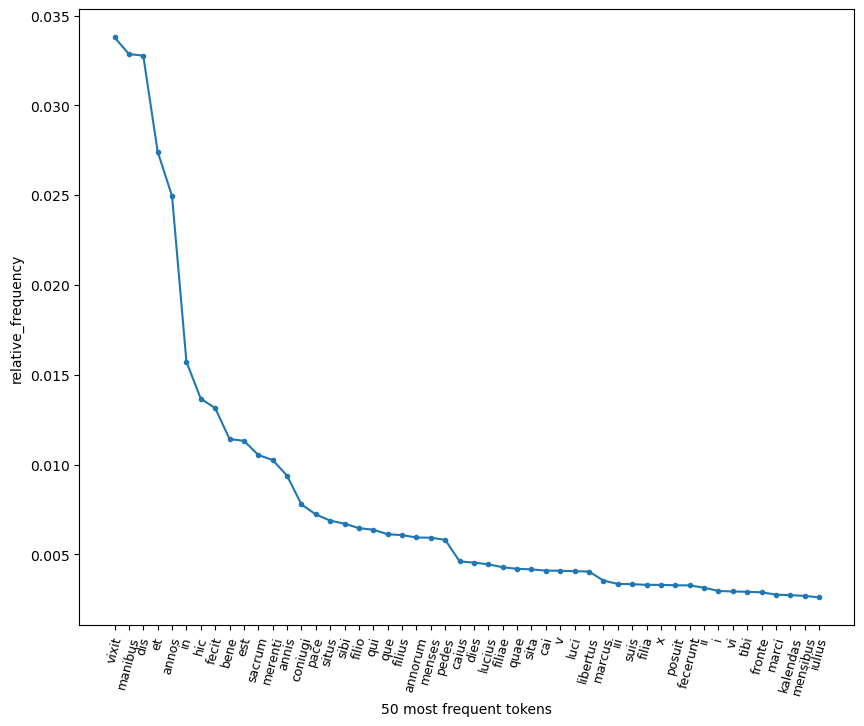

In [11]:
##create a plot
subset = frequencies.head(50)

plt.figure(figsize=(10, 8))
plt.plot(subset['word'], subset['relative_frequency'], marker='.', linestyle='-')
plt.ylabel('relative_frequency')
plt.xlabel('50 most frequent tokens')
plt.xticks(rotation=75, fontsize=9)

plt.savefig('relative_frequency_50_words.pdf')

plt.show()